In [1]:
import pm4py

In [2]:
log = pm4py.read_xes(r'datasets\second_group_of_synthetic_logs\203197147_noisy.xes')
df = pm4py.convert_to_dataframe(log)
df

,concept:name,time:timestamp,ID
0,receive order,1970-04-26 18:46:42+00:00,0
1,cancel order,1970-04-26 18:46:43+00:00,0
2,receive order,1970-04-26 18:46:44+00:00,1
3,collect cold goods,1970-04-26 18:46:45+00:00,1
4,cancel order,1970-04-26 18:46:46+00:00,1
...,...,...,...
20237,choose remove goods,1970-04-26 23:58:02+00:00,2075
20238,choose remove goods,1970-04-26 23:58:03+00:00,2075
20239,choose remove goods,1970-04-26 23:58:04+00:00,2075
20240,choose remove goods,1970-04-26 23:58:05+00:00,2075


In [3]:
# print out the head of the event log
df.head()

,concept:name,time:timestamp,ID
0,receive order,1970-04-26 18:46:42+00:00,0
1,cancel order,1970-04-26 18:46:43+00:00,0
2,receive order,1970-04-26 18:46:44+00:00,1
3,collect cold goods,1970-04-26 18:46:45+00:00,1
4,cancel order,1970-04-26 18:46:46+00:00,1


In [4]:
import numpy as np
unique_activities = np.unique(df['concept:name'])
len(unique_activities)

16

In [5]:
# extract the activities
activities = df['concept:name']
activities

0               receive order
1                cancel order
2               receive order
3          collect cold goods
4                cancel order
                 ...         
20237    choose  remove goods
20238    choose  remove goods
20239    choose  remove goods
20240    choose  remove goods
20241    choose  remove goods
Name: concept:name, Length: 20242, dtype: object

In [6]:
# combine the rows by case number 
df1 =df.groupby('ID', as_index=False).agg(lambda x: x.tolist())
df1

,ID,concept:name,time:timestamp
0,0,"[receive order, cancel order]","[1970-04-26 18:46:42+00:00, 1970-04-26 18:46:4..."
1,1,"[receive order, collect cold goods, cancel order]","[1970-04-26 18:46:44+00:00, 1970-04-26 18:46:4..."
2,2,[create change customer profile],[1970-04-26 18:46:47+00:00]
3,3,[choose remove goods],[1970-04-26 18:46:48+00:00]
4,4,"[receive order, prepare warm goods, order pack...","[1970-04-26 18:46:49+00:00, 1970-04-26 18:46:5..."
...,...,...,...
2071,2071,"[choose remove goods, choose remove goods, c...","[1970-04-26 23:57:17+00:00, 1970-04-26 23:57:1..."
2072,2072,"[choose remove goods, choose remove goods, c...","[1970-04-26 23:57:27+00:00, 1970-04-26 23:57:2..."
2073,2073,"[choose remove goods, choose remove goods, c...","[1970-04-26 23:57:37+00:00, 1970-04-26 23:57:3..."
2074,2074,"[choose remove goods, choose remove goods, c...","[1970-04-26 23:57:47+00:00, 1970-04-26 23:57:4..."


In [7]:
import re
# extract the traces
activities = df1['concept:name']
# convert all traces and case status into a string
activities = df1["concept:name"].astype(str)
activities

0                       ['receive order', 'cancel order']
1       ['receive order', 'collect cold goods', 'cance...
2                      ['create change customer profile']
3                                ['choose  remove goods']
4       ['receive order', 'prepare warm goods', 'order...
                              ...                        
2071    ['choose  remove goods', 'choose  remove goods...
2072    ['choose  remove goods', 'choose  remove goods...
2073    ['choose  remove goods', 'choose  remove goods...
2074    ['choose  remove goods', 'choose  remove goods...
2075    ['choose  remove goods', 'choose  remove goods...
Name: concept:name, Length: 2076, dtype: object

In [8]:
import numpy as np
unique_traces = np.unique(df1['concept:name'])
len(unique_traces)

2061

In [9]:
activities[14]

"['cancel confirmed', 'create change customer profile', 'create change customer profile', 'create change customer profile', 'choose  remove goods']"

In [10]:
len(activities)

2076

In [11]:
#Cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(activities)):
    pre = re.sub('[^a-zA-Z]', ' ', activities[i])
    pre = pre.lower()
    pre = pre.split()
    pre = [ps.stem(word) for word in pre if not word in set(stopwords.words('english'))]
    pre = ' '.join(pre)
    corpus.append(pre)

In [12]:
len(corpus)

2076

In [13]:
corpus[14]

'cancel confirm creat chang custom profil creat chang custom profil creat chang custom profil choos remov good'

In [14]:
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
words = nltk.word_tokenize(corpus[0])
words

['receiv', 'order', 'cancel', 'order']

In [15]:
vocab = []
for i in range(len(corpus)):
    all_words = nltk.word_tokenize(corpus[i])
    vocab.append(all_words)
    print(all_words)

['receiv', 'order', 'cancel', 'order']
['receiv', 'order', 'collect', 'cold', 'good', 'cancel', 'order']
['creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good']
['receiv', 'order', 'prepar', 'warm', 'good', 'order', 'pack', 'ship', 'order']
['receiv', 'order', 'order', 'pack', 'ship', 'order']
['retriev', 'order', 'receiv', 'order', 'collect', 'cold', 'good', 'prepar', 'warm', 'good', 'order', 'pack', 'ship', 'order', 'choos', 'profil']
['receiv', 'order', 'collect', 'cold', 'good', 'order', 'pack', 'collect', 'cold', 'good', 'ship', 'order', 'creditcardnr']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['prepar', 'warm', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'cancel', 'confirm', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'checkout', 'choos', 'profil', 'deliveri', 'time', 'creditcardnr', 'complet', '

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'checkout', 'choos', 'profil', 'order', 'pack', 'deliveri', 'time', 'deliveri', 'time', 'creditcardnr', 'complet', 'checkout', 'confirm', 'mail', 'retriev', 'order', 'creditcardnr']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'checkout', 'choos', 'profil', 'deliveri', 'time', 'creditcardnr', 'complet', 'checkout', 'confirm', 'mail', 'retriev', 'order']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'checkout', 'choos', 'profil', 'deliveri', 'time', 'creditcardnr', 'complet', 'checkout', 'confirm', 'mail', 'retriev', 'order']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'checkout', 'choos', 'profil', 'deliveri', 'time', 'creditcardnr', 'complet', 'checkout', 'confirm', 'mail', 'retriev', 'order']
['choos', 'remov', 'good', 'cre

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'order', 'pack', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', '

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['checkout', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'order', 'pack', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'ship', 'order', 'creat', 'chang', 'custom', 'profil', 'creditcardnr']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'confirm', 'mail', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'pr

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'cancel', 'confirm', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'receiv', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'pr

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'checkout', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'collect', 'cold', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos',

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'retriev', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'checkout', 'prepar', 'warm', 'good']
['confirm', 'mail', 'retriev', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creditcardnr', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'ch

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'complet', 'checkout', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'retriev', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'go

['receiv', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'cancel', 'confirm', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'complet', 'checkout', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'cancel', 'order', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'checkout', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'ship', 'order']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang

['confirm', 'mail', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'retriev', 'order', 'creditcardnr', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'cust

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'cancel', 'order', 'choos', 'remov', 'good', 'creditcardnr', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'checkout', 'deliveri', 'time']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'receiv', 'order', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['cancel', 'order', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'c

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['retriev', 'order', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'retriev', 'order', 'creat', 'chang', 'custom', 'p

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'prepar', 'warm', 'good', 'creditcardnr', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'retriev', 'order', 'choos', 'remov', 'good', 'complet', 'checkout', 'choos', 'remov', 'good', 'receiv', 'order', 'creat', 'chang', 'custom', 'profil', 'rec

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'checkout', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'collect', 'cold', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creditcardnr']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['ship', 'o

['creat', 'chang', 'custom', 'profil', 'receiv', 'order', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'complet', 'checkout', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'receiv', 'order', 'cancel', 'order', 'choos', 'remov', 'good', 'cancel', 'order']
['prepar', 'warm', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'prepar', 'warm', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'p

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'prepar', 'warm', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'confirm', 'mail', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chan

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'checkout', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'ship', 'order', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov',

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'order', 'pack', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat'

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good'

['checkout', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'collect', 'cold', 'good', 'complet', 'checkout', 'creat', 'chang', 'custom', 'profil', 'choos', 'profil', 'checkout', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'prof

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['retriev', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'prepar', 'warm', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'cre

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'complet', 'checkout', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'confirm', 'mail', 'choos', 'remov', 'good', 'confirm', 'mail', 'creat', 'chang', 'custom', 'profil', 'cancel', 'confirm', 'creditcardnr', 'confirm', 'mail', 'creat', 'chang', 'custom', 'profil', 'deliveri', 'time', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['deliveri', 'time', 'cancel', 'order', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'ch

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['complet', 'checkout', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'cancel', 'confirm', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'checkout']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat',

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'collect', 'cold', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'retriev', 'order', 'confirm', 'mail', 'creditcardnr', 'choos', 'remov', 'good', 'order', 'pack', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'cha

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'collect', 'cold', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'cancel', 'order', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'receiv', 'order', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'r

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'order', 'pack']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'order', 'pack', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'collect', 'cold', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'cu

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'retriev', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'prepar', 'warm', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'order', 'pack', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'go

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'ship', 'order', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'receiv', 'order', 'creat', 'chang', 'custom', 'profil', 'creat', 'c

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'complet', 'checkout', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'complet', 'checkout']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'ship', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'confirm', 'mail', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'cha

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'confirm', 'mail', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creditcardnr', 'creat', 'chang', 'custom', 'profil',

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'ship', 'order', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'checkout', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good'

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'confirm', 'mail', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profi

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'order', 'pack', 'cancel', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'ch

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov',

['creat', 'chang', 'custom', 'profil', 'ship', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['receiv', 'order', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', '

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creditcardnr', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'prepar', 'warm', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil

['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'cancel', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'p

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creditcardnr', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'deliveri', 'time', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'checkout', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'confirm', 'mail', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat

['receiv', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'complet', 'checkout', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good',

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'collect', 'cold', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'ship', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choo

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'complet', 'checkout', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'deliveri', 'time', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'retriev', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['crea

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creditcardnr', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang'

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'confirm', 'mail', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos',

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'cancel', 'order', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'cancel', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'rem

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'collect', 'cold', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'order', 'pack', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['cre

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'cancel', 'confirm', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['cr

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'complet', 'checkout']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'receiv', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov'

['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'order', 'pack', 'complet', 'checkout', 'choos', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'confirm', 'mail']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', '

['choos', 'remov', 'good', 'order', 'pack', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil'

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'order', 'pack', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang',

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'complet', 'checkout', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'ship', 'order', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'collect', 'cold', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'cus

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'complet', 'checkout', 'creat', 'chang', 'custom', 'profil', 'deliveri', 'time', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'retriev', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good'

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'deliveri', 'time', 'choos', 'remov', 'good', 'choos', 'profil', 'choos', 'remo

['receiv', 'order', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'ship', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good'

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'cancel', 'confirm', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'prepar', 'warm', 'good', 'creat', 'chang', 'custom', 'profil', 'receiv', 'order', 'choos', 'remov', 'go

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['receiv', 'order', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'retriev', 'order', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'go

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'retriev', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 

['choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'collect', 'cold', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good'

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creditcardnr', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'confirm', 'mail', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'prepar', 'warm', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'checkout', 'creat', 'chang', 'custom', 

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['receiv', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'ch

['prepar', 'warm', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'order', 'pack', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'pro

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'ship', 'order', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'prepar', 'warm', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos',

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'cancel', 'confirm']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'collect', 'cold', 'good', 'prepar', 'warm', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'collect', 'cold', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creditcardnr', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['ch

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'goo

['checkout', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'prepar', 'warm', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'g

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'complet', 'checkout', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'complet', 'checkout', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'confirm', 'mail', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'prepar', 'warm', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'choos',

['choos', 'remov', 'good', 'retriev', 'order', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'receiv', 'order', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov

['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'cancel', 'confirm', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'checkout', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil', 'creat', 'chang', 'custom', 'profil']
['choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos', 'remov', 'good', 'choos'

In [16]:
vocab[13]
    

['choos',
 'remov',
 'good',
 'checkout',
 'choos',
 'profil',
 'deliveri',
 'time',
 'creditcardnr',
 'complet',
 'checkout',
 'confirm',
 'mail',
 'retriev',
 'order']

In [17]:
import gensim
from gensim.models import Word2Vec
model = gensim.models.Word2Vec(vocab, vector_size=100, window=3, min_count=0,sg=1)
nrEpochs= 10
model.train(vocab,total_examples=model.corpus_count,start_alpha=0.025, epochs=nrEpochs)
model.alpha -= 0.002  # decrease the learning rate
model.min_alpha = model.alpha  # fix the learning rate, no decay


In [18]:
model

In [19]:
vocabulary = model.wv.key_to_index
vocabulary
   

{'good': 0,
 'choos': 1,
 'profil': 2,
 'remov': 3,
 'creat': 4,
 'chang': 5,
 'custom': 6,
 'order': 7,
 'cancel': 8,
 'confirm': 9,
 'checkout': 10,
 'creditcardnr': 11,
 'mail': 12,
 'deliveri': 13,
 'time': 14,
 'complet': 15,
 'receiv': 16,
 'pack': 17,
 'ship': 18,
 'prepar': 19,
 'warm': 20,
 'retriev': 21,
 'cold': 22,
 'collect': 23}

In [20]:
sim_words = model.wv.most_similar('remov')
sim_words

[('good', 0.6239868402481079),
 ('choos', 0.5903679728507996),
 ('custom', 0.5595554113388062),
 ('profil', 0.5220448970794678),
 ('creat', 0.5158519744873047),
 ('chang', 0.501610517501831),
 ('receiv', 0.3211010992527008),
 ('warm', 0.29886677861213684),
 ('prepar', 0.28837546706199646),
 ('cold', 0.28111034631729126)]

In [21]:
model.wv['remov']

array([-0.10394291,  0.0580084 ,  0.04591739,  0.06205649,  0.0019646 ,
       -0.13994227, -0.00060256,  0.18430465, -0.12290473, -0.16789106,
        0.09767994,  0.05957736,  0.04097377, -0.01300293,  0.1391895 ,
        0.04028482,  0.22736393, -0.0174366 , -0.12103195, -0.142755  ,
        0.04486237, -0.13746633,  0.30497685,  0.02727426, -0.09255651,
        0.06554152,  0.00946144,  0.17035092, -0.09104145,  0.12166808,
        0.19674948, -0.01187556, -0.02761865, -0.13770218,  0.12978894,
        0.14019996,  0.10506601, -0.04155041, -0.16085395,  0.12475701,
        0.13363247, -0.06227918, -0.09272911,  0.10489479,  0.16229255,
       -0.04421768, -0.05069635, -0.04798136,  0.08905008, -0.00990713,
        0.00180501, -0.04004091, -0.09585094, -0.08469234, -0.1291739 ,
        0.02013249, -0.11519665,  0.02795421,  0.08387223,  0.0117819 ,
        0.04618107,  0.07984462,  0.16650076,  0.08658426, -0.03660381,
        0.1271463 ,  0.00486616,  0.26664314, -0.03858815, -0.06

In [22]:
vocab[0]

['receiv', 'order', 'cancel', 'order']

In [23]:
len(vocab[0])

4

In [24]:
import numpy as np
vectors = []
for i in range(len(vocab)):
        case_vector = []
        for j in range(len(vocab[i])):
            try:
                case_vector.append(model.wv[vocab[i][j]])
            except KeyError:
                pass
        vectors.append(np.array(case_vector).mean(axis=0))

In [25]:
a=np.shape(vectors)
a

(2076, 100)

In [26]:
b=model.vector_size
b

100

In [27]:
len(vectors)

2076

In [28]:
vectors

[array([ 0.18539128, -0.20657405,  0.34993365,  0.2477102 ,  0.01439403,
         0.00628632,  0.10149425,  0.04466089, -0.13308185, -0.21633002,
        -0.08905819, -0.2009947 ,  0.18694337,  0.01301375,  0.04094704,
         0.0811404 ,  0.05157122, -0.07496564, -0.03744573, -0.33241284,
         0.09649414,  0.23807672, -0.01576078, -0.28569743, -0.10166068,
         0.25385466, -0.2398399 ,  0.14734963, -0.09626068,  0.14357132,
        -0.04836165,  0.02773376, -0.03161605, -0.1329808 , -0.11233912,
        -0.02305079, -0.12870216,  0.02552642, -0.14183228, -0.06266172,
         0.22515857, -0.0355454 , -0.04271413,  0.05085991,  0.0856784 ,
        -0.25751626, -0.18127713, -0.07332214,  0.1853379 ,  0.1244175 ,
        -0.09265304, -0.06510305,  0.22443569, -0.12174453, -0.02443021,
         0.21532722, -0.24289368,  0.08255154,  0.07822911,  0.12089656,
         0.01390198, -0.00863479,  0.03343318,  0.2951715 , -0.09228093,
         0.23800586, -0.2216818 ,  0.20629711, -0.0

In [29]:
# read the csv file of the event log
import pandas as pd
df2 = pd.read_csv(r'C:\Users\Nela\Desktop\University Courses\Semester 4\Master Thesis\Thesis\DataSet\Synthetic_Event_logs\Second Group of Synthetic Event Logs\203197147.csv')
df2

,Unnamed: 0,ID,concept:name,Status
0,0,0,"['receive order', 'cancel order']",Normal
1,1,1,"['receive order', 'collect cold goods', 'cance...",Normal
2,2,2,['create change customer profile'],Normal
3,3,3,['choose remove goods'],Normal
4,4,4,"['receive order', 'prepare warm goods', 'order...",Normal
...,...,...,...,...
2071,2071,2071,"['choose remove goods', 'choose remove goods...",Anomalous
2072,2072,2072,"['choose remove goods', 'choose remove goods...",Normal
2073,2073,2073,"['choose remove goods', 'choose remove goods...",Anomalous
2074,2074,2074,"['choose remove goods', 'choose remove goods...",Anomalous


In [30]:
Y=df2['Status'].astype(str)
Y

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
          ...    
2071    Anomalous
2072       Normal
2073    Anomalous
2074    Anomalous
2075       Normal
Name: Status, Length: 2076, dtype: object

In [31]:
# get binary values for the case status
y=pd.get_dummies(Y)
y=y.iloc[:,1].values
y.shape

(2076,)

In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from matplotlib import pyplot as plt



In [33]:
print("No. of unique labels ", len(np.unique(y)))
print("Label values ",np.unique(y))
#1 is for normal traces
#0 is for anomalous traces
print('-------')
print("Break down of the Normal and Anomalous Traces")
print(pd.value_counts(y, sort = True) )

No. of unique labels  2
Label values  [0 1]
-------
Break down of the Normal and Anomalous Traces
1    1202
0     874
dtype: int64


In [34]:
X=np.array(vectors)


In [35]:
#Split training and test data
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [37]:
#Make sure the scale worked correctly?
#A correct transformation of X_train will ensure that the means and variances of each column of the flattened X_train are 0 and 1, respectively. 
print('colwise mean', np.mean(train_data, axis=0).round(6))
print('colwise variance', np.var(train_data, axis=0))

colwise mean [ 0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  0. -0.  0. -0. -0.
  0.  0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0. -0. -0. -0. -0. -0.  0.
 -0.  0. -0. -0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0.  0. -0.
  0.  0.  0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0.  0. -0. -0.  0.  0.
  0. -0. -0. -0. -0.  0.  0.  0. -0. -0.]
colwise variance [1.0000038  0.9999991  1.0000001  0.99999845 0.999999   1.0000026
 0.9999956  1.0000005  0.9999972  1.000003   0.9999982  1.0000008
 0.99999994 1.0000007  1.0000011  1.         0.9999991  1.0000011
 0.99999934 0.99999946 1.0000035  1.0000005  0.9999986  1.0000018
 0.99999756 0.999999   1.0000013  1.000001   1.000002   0.99999744
 0.99999875 0.99999976 1.0000011  1.0000015  0.99999905 1.0000008
 0.9999999  0.9999985  0.9999994  0.99999964 0.9999982  0.9999981
 1.0000038  0.9999971  0.99999815 0.99999714 0.99999535 1.0000005
 0.9999979  0.9999965  0.99999934 

In [38]:
#You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as 1. 
#Separate the normal rhythms from the abnormal rhythms.
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = np.array(train_data[train_labels])
normal_test_data = np.array(test_data[test_labels])

anomalous_train_data = np.array(train_data[~train_labels])
anomalous_test_data = np.array(test_data[~test_labels])

In [39]:
len(normal_train_data),len(normal_test_data),len(anomalous_train_data),len(anomalous_test_data)

(969, 233, 691, 183)

In [40]:
# conver 2d dataframe to 3d array
import numpy as np
from numpy import newaxis
X_train_ar = np.array(normal_train_data) 
X_test_ar = np.array(test_data ) 
Normal_train_3d = X_train_ar[:,newaxis,:]
test_data_3d = X_test_ar[:,newaxis,:]
print(Normal_train_3d.shape)
print(test_data_3d.shape)

(969, 1, 100)
(416, 1, 100)


In [41]:
import keras
# define model
model = keras.Sequential()
#encoder
model.add(keras.layers.LSTM(128, activation='relu', input_shape=(Normal_train_3d.shape[1],Normal_train_3d.shape[2]), return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.LSTM(64, activation='relu', return_sequences=False))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.RepeatVector(1))
#decoder
model.add(keras.layers.LSTM(64, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.LSTM(128, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.TimeDistributed(Dense(Normal_train_3d.shape[2])))
model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            117248    
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 64)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                        

In [42]:
import time
start_time = time.time()

In [43]:
#Notice that the LSTM is trained using only the normal traces, but is evaluated using the full test set.
history = model.fit(Normal_train_3d, Normal_train_3d, 
          epochs=100, 
          batch_size=32,
          validation_data=(test_data_3d, test_data_3d),
          shuffle=True)

Epoch 1/100
31/31 [==============================] - 6s 29ms/step - loss: 0.6130 - accuracy: 0.0000e+00 - val_loss: 0.6374 - val_accuracy: 0.0000e+00
Epoch 2/100
31/31 [==============================] - 0s 7ms/step - loss: 0.3758 - accuracy: 0.0712 - val_loss: 0.3672 - val_accuracy: 0.3341
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 0.1895 - accuracy: 0.2343 - val_loss: 0.3528 - val_accuracy: 0.2644
Epoch 4/100
31/31 [==============================] - 0s 9ms/step - loss: 0.1483 - accuracy: 0.3055 - val_loss: 0.3022 - val_accuracy: 0.3197
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 0.1259 - accuracy: 0.3519 - val_loss: 0.2687 - val_accuracy: 0.2933
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 0.1172 - accuracy: 0.3787 - val_loss: 0.2765 - val_accuracy: 0.4736
Epoch 7/100
31/31 [==============================] - 0s 11ms/step - loss: 0.1078 - accuracy: 0.4396 - val_loss: 0.2940 - val_accuracy: 0.5168
Ep

31/31 [==============================] - 0s 15ms/step - loss: 0.0610 - accuracy: 0.7152 - val_loss: 0.2539 - val_accuracy: 0.5817
Epoch 59/100
31/31 [==============================] - 0s 10ms/step - loss: 0.0551 - accuracy: 0.7534 - val_loss: 0.2607 - val_accuracy: 0.5553
Epoch 60/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0596 - accuracy: 0.7606 - val_loss: 0.2617 - val_accuracy: 0.4663
Epoch 61/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0583 - accuracy: 0.7523 - val_loss: 0.2651 - val_accuracy: 0.4351
Epoch 62/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0545 - accuracy: 0.7699 - val_loss: 0.2524 - val_accuracy: 0.5865
Epoch 63/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0587 - accuracy: 0.7853 - val_loss: 0.2570 - val_accuracy: 0.5385
Epoch 64/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0522 - accuracy: 0.7946 - val_loss: 0.2527 - val_accuracy: 0.5505
Epoch 65/100
31/3

In [44]:
elapsed_time = time.time() - start_time

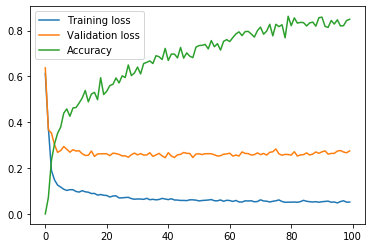

In [45]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()

(array([947.,   6.,   0.,   1.,   1.,   0.,   1.,   3.,   0.,   0.,   3.,
          1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   3.]),
 array([0.00272428, 0.08478154, 0.16683881, 0.24889608, 0.33095333,
        0.4130106 , 0.49506786, 0.57712513, 0.6591824 , 0.74123967,
        0.82329696, 0.9053542 , 0.98741144, 1.0694687 , 1.151526  ,
        1.2335832 , 1.3156406 , 1.3976978 , 1.479755  , 1.5618123 ,
        1.6438696 , 1.7259269 , 1.8079841 , 1.8900414 , 1.9720987 ,
        2.0541558 , 2.1362133 , 2.2182705 , 2.3003278 , 2.382385  ,
        2.4644423 ], dtype=float32),
 <a list of 30 Patch objects>)

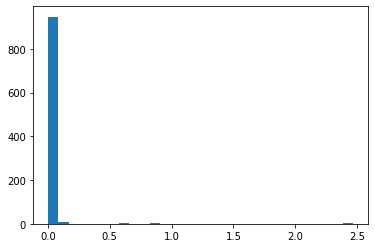

In [46]:
trainPredict = model.predict(Normal_train_3d)
trainMAE = np.mean(np.abs(trainPredict - Normal_train_3d),axis=2)
plt.hist(trainMAE, bins=30)

In [47]:
####We should not estimate the classification threshold from the test data. It will result in overfitting.
threshold = np.mean(trainMAE) + np.std(trainMAE)
print("Threshold: ", threshold)

Threshold:  0.21868429


(array([226.,  18.,   7.,   0.,   2.,   7.,   5.,   7.,  21.,  20.,  24.,
         10.,   6.,   9.,   8.,  15.,   5.,   3.,   4.,   6.,   4.,   3.,
          1.,   3.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00272434, 0.05550697, 0.10828961, 0.16107224, 0.21385488,
        0.2666375 , 0.31942013, 0.37220278, 0.4249854 , 0.47776803,
        0.53055066, 0.5833333 , 0.6361159 , 0.68889856, 0.7416812 ,
        0.7944638 , 0.84724647, 0.9000291 , 0.9528117 , 1.0055944 ,
        1.058377  , 1.1111597 , 1.1639422 , 1.2167249 , 1.2695075 ,
        1.3222902 , 1.3750728 , 1.4278555 , 1.480638  , 1.5334207 ,
        1.5862033 ], dtype=float32),
 <a list of 30 Patch objects>)

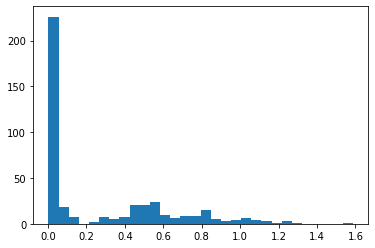

In [48]:
testPredict = model.predict(test_data_3d)
testMAE = np.mean(np.abs(testPredict - test_data_3d), axis=2)
plt.hist(testMAE, bins=30)

In [49]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import  auc, roc_curve

In [50]:
preds= tf.math.less(testMAE,threshold)
preds.shape

TensorShape([416, 1])

In [51]:
print("Accuracy = {}".format(accuracy_score(preds, test_labels)))
print("Precision = {}".format(precision_score(preds, test_labels)))
print("Recall = {}".format(recall_score(preds, test_labels)))
print("Fscore = {}".format(f1_score(preds, test_labels)))
print( 'Time=', elapsed_time )

Accuracy = 0.9423076923076923
Precision = 0.9871244635193133
Recall = 0.9163346613545816
Fscore = 0.9504132231404957
Time= 35.23811626434326


In [52]:
conf_matrix = confusion_matrix(preds, test_labels)
conf_matrix

array([[162,   3],
       [ 21, 230]], dtype=int64)

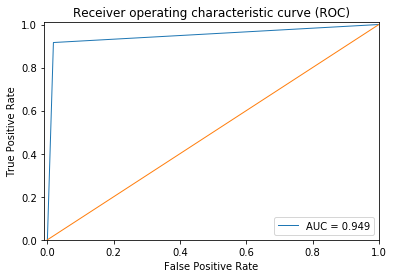

In [53]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(preds, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [54]:
print('# Unique Tasks=',len(unique_activities))
print('# Traces=', len(activities))
print('# UniqueTraces=', len(unique_traces))
print("# Normal and Anomalous Traces")
print(pd.value_counts(y, sort = True) )
print('# Normal train traces=', len(normal_train_data))
print('# Normal test traces=', len(normal_test_data))
print('# Anomalous train traces=', len(anomalous_train_data))
print('# Anomalous test traces=', len(anomalous_test_data))

# Unique Tasks= 16
# Traces= 2076
# UniqueTraces= 2061
# Normal and Anomalous Traces
1    1202
0     874
dtype: int64
# Normal train traces= 969
# Normal test traces= 233
# Anomalous train traces= 691
# Anomalous test traces= 183


In [55]:
print("Accuracy = {}".format(accuracy_score(preds, test_labels)))
print("Precision = {}".format(precision_score(preds, test_labels)))
print("Recall = {}".format(recall_score(preds, test_labels)))
print("Fscore = {}".format(f1_score(preds, test_labels)))
print( 'Time=', elapsed_time )

Accuracy = 0.9423076923076923
Precision = 0.9871244635193133
Recall = 0.9163346613545816
Fscore = 0.9504132231404957
Time= 35.23811626434326
